In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/mllab/Downloads/concrete_data.csv')

In [3]:
display(data)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
X = data.iloc[:1028, :8]
y = data.iloc[:1028, 8:]

X = np.vstack((np.ones((X.shape[0],)),X.T)).T
def model(X, y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    theta_list = np.zeros((iteration, len(theta)))
    for i in range(iteration):
        Y = np.dot(X, theta)
        cost = (1/(2*m)) * np.sum(np.square(Y - y))
        d_theta = (1/m) * np.dot(X.T, Y - y)
        theta -= learning_rate * d_theta
        cost_list.append(cost)
        theta_list[i,:] = theta.T
    print(cost)
    return theta, cost_list, theta_list

In [13]:
learning_rate = 0.000001
iteration = 10000
theta, cost_list, theta_list = model(X, y, learning_rate, iteration)

concrete_compressive_strength    54.004622
dtype: float64


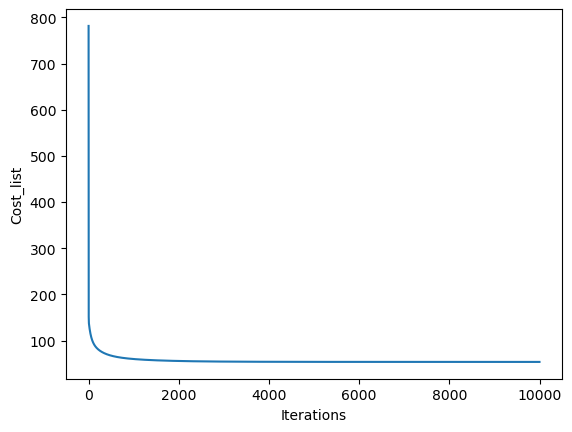

In [6]:
rng = np.arange(0,iteration)
plt.plot(rng,cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost_list')
plt.show()

In [7]:
display(data.iloc[1028:,:])

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [9]:
array = np.array([1, 159.1, 186.7, 0.0, 175.6, 11.3, 989.6, 788.9, 28])
predict = np.dot(array, theta)
print(predict)

[27.8283726]


In [10]:
array = np.array([1, 260.9, 100.5, 78.3, 200.6, 8.6, 864.5, 761.5, 28])
predict = np.dot(array, theta)
print(predict)

[31.38784945]
